# Project 2:  Holiday weather

by Rob Griffiths, 11 September 2015, updated 11 April, 18 October and 20 December 2017, 5 August 2020
Edited by May Alavi, 17 November 2021

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

In this project I am going to use the historic weather data from the Weather Underground for Moscow to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2021 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

_(The following instructions were correct as of 2017. Wunderground has since changed its data provision.)_

When the new page opens start typing 'Moscow' in the 'Location' input box and when the pop up menu comes up with the option 'Moscow, Moscow, Russia' select it and then click on 'Submit'. 

When the next page opens with SHEREMETYEVO INTERNATIONAL AIRPORT STATION data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
The whole 2014 data has been saved as 'Moscow_SVO_2014.csv'. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [6]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
from datetime import datetime

Moscow = read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)
Moscow

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,-7,-9,-13,-8,-9,-14,93,91,80,...,10.0,10.0,8.0,26,19,43.0,0.0,7.0,NaN,224<br />
361,2014-12-28,-10,-12,-15,-11,-13,-16,93,92,85,...,10.0,7.0,0.0,18,8,NaN,0.0,7.0,Fog-Snow,36<br />
362,2014-12-29,-12,-14,-17,-13,-17,-19,92,87,78,...,10.0,10.0,9.0,18,13,NaN,0.0,7.0,Snow,306<br />
363,2014-12-30,-15,-17,-18,-17,-18,-20,92,86,85,...,10.0,10.0,9.0,21,14,40.0,0.0,4.0,NaN,320<br />


## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [8]:
Moscow = Moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
Moscow

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,-7,-9,-13,-8,-9,-14,93,91,80,...,10.0,10.0,8.0,26,19,43.0,0.0,7.0,NaN,224<br />
361,2014-12-28,-10,-12,-15,-11,-13,-16,93,92,85,...,10.0,7.0,0.0,18,8,NaN,0.0,7.0,Fog-Snow,36<br />
362,2014-12-29,-12,-14,-17,-13,-17,-19,92,87,78,...,10.0,10.0,9.0,18,13,NaN,0.0,7.0,Snow,306<br />
363,2014-12-30,-15,-17,-18,-17,-18,-20,92,86,85,...,10.0,10.0,9.0,21,14,40.0,0.0,4.0,NaN,320<br />


remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [14]:
Moscow['WindDirDegrees'] = Moscow['WindDirDegrees'].str.rstrip('<br />')
Moscow[['WindDirDegrees']]

,WindDirDegrees
0,227
1,200
2,134
3,157
4,195
...,...
360,224
361,36
362,306
363,320


In [15]:
Moscow.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

and change the values in the `'WindDirDegrees'` column to `float64`:

In [16]:
Moscow['WindDirDegrees'] = Moscow['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [18]:
Moscow['Date'] = to_datetime(Moscow['Date'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [19]:
Moscow.index = Moscow['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as Moscow is in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

summer = Moscow.loc[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [21]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10.0,9.0,5.0,29,11,40.0,0.0,6.0,Rain,236.0
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10.0,10.0,9.0,47,5,68.0,0.0,6.0,Rain-Thunderstorm,35.0


Summer 2014 was rather cool in Moscow: there are only two days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [22]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

<AxesSubplot:xlabel='Date'>

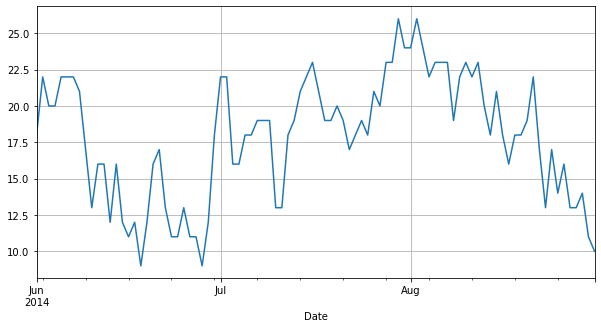

In [23]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph, mid-August looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

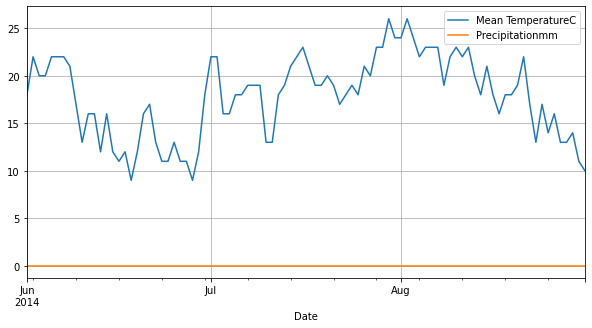

In [24]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Mid-August is still looking good, with no rain. Let's have a closer look by just plotting mean temperature and precipitation for August.  

<AxesSubplot:xlabel='Date'>

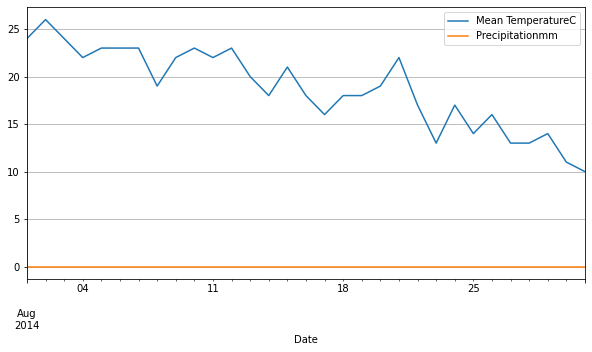

In [27]:
August = summer.loc[datetime(2014,8,1) : datetime(2014,8,31)]
August[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

It now looks that, actually, the beginning of August will have warmer days. the 1st to 21st of August are all above 15 degrees. 

## Conclusions

The graphs have shown the volatility of summers in Moscow, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. By the time you have finished this course you should be able to do that.